import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
Test generalizability in predicting link time series. The idea is to see if we can use the group-level beta coefficients to see how they perform in predicting the edge time series of new subjects.

In [1]:
from sklearn.linear_model import LinearRegression
from nilearn.image import load_img
from scipy.spatial.distance import squareform

In [2]:
final_subjects = np.loadtxt("../../data/subjects_intersect_motion_035.txt")
n_subjects = len(final_subjects)
print(n_subjects)

n_scans = 280 #

<IPython.core.display.Javascript object>

242


/home/javi/Documentos/software/nilearn/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


<IPython.core.display.Javascript object>

[[10 150 290 430]
 [60 60 60 60]
 [1 1 1 1]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

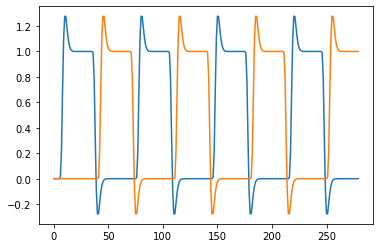

In [3]:
from nilearn.glm.first_level import compute_regressor
task_events = pd.read_csv("../../data/task-stroop_events.tsv", sep="\t")

inc_cond = task_events[task_events.loc[:,"trial_type"]=="Incongruent"].to_numpy().T
inc_cond[2,:] = [1,1,1,1]
print(inc_cond)

con_cond = task_events[task_events.loc[:,"trial_type"]=="Congruent"].to_numpy().T
con_cond[2,:] = [1,1,1,1]

frame_times = np.arange(280)*2.0

inc_regressor, _ = compute_regressor(inc_cond, 
                                     hrf_model = "glover + derivative + dispersion", frame_times=frame_times)
inc_regressor = np.squeeze(inc_regressor)

con_regressor, _ = compute_regressor(con_cond, 
                                     hrf_model = "glover + derivative + dispersion", frame_times=frame_times)
con_regressor = np.squeeze(con_regressor)

#fix_regressor, _ = compute_regressor(fix_cond, hrf_model= "glover", frame_times=frame_times)
#fix_regressor = np.squeeze(fix_regressor)

X = np.column_stack((inc_regressor, con_regressor))
plt.plot(X[:,0])
plt.plot(X[:,3])

In [4]:
# WITHIN task performances
r2_scores_stroop_stroop = np.load("../../results/generalizability/gsr/scores_stroop_stroop.npz")['r2_scores']
r2_scores_stroop_stroop = r2_scores_stroop_stroop.mean(1)

r2_scores_msit_msit = np.load("../../results/generalizability/gsr/scores_msit_msit.npz")['r2_scores']
r2_scores_msit_msit = r2_scores_msit_msit.mean(1)

# BETWEEN task performances
r2_scores_stroop_msit = np.load("../../results/generalizability/gsr/scores_stroop_msit.npz")['r2_scores']
r2_scores_stroop_msit = r2_scores_stroop_msit.mean(1)

r2_scores_msit_stroop = np.load("../../results/generalizability/gsr/scores_msit_stroop.npz")['r2_scores']
r2_scores_msit_stroop = r2_scores_msit_stroop.mean(1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
def summary_stat(scores):
    from scipy.stats import sem
    mean_r2_edges = scores.mean(0)
    sem_r2_edges = sem(scores, axis=0)
    u_r2_emp = mean_r2_edges + 1.96*sem_r2_edges
    l_r2_emp = mean_r2_edges - 1.96*sem_r2_edges
    
    return mean_r2_edges, l_r2_emp, u_r2_emp

In [6]:
mean_r2_stroop_stroop, l_r2_stroop_stroop, u_r2_stroop_stroop = summary_stat(r2_scores_stroop_stroop)
mean_r2_msit_msit, l_r2_msit_msit, u_r2_msit_msit = summary_stat(r2_scores_msit_msit)

mean_r2_stroop_msit, l_r2_stroop_msit, u_r2_stroop_msit = summary_stat(r2_scores_stroop_msit)
mean_r2_msit_stroop, l_r2_msit_stroop, u_r2_msit_stroop = summary_stat(r2_scores_msit_stroop)

within_task_scores_df = pd.DataFrame({'stroop_stroop': mean_r2_stroop_stroop, 
                                      'msit_msit': mean_r2_msit_msit
                                     })


between_task_scores_df = pd.DataFrame({'stroop_msit': mean_r2_stroop_msit, 
                                      'msit_stroop': mean_r2_msit_stroop
                                     })

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
pd.melt(within_task_scores_df)

<IPython.core.display.Javascript object>

,variable,value
0,stroop_stroop,0.007798
1,stroop_stroop,0.110323
2,stroop_stroop,0.084064
3,stroop_stroop,0.000824
4,stroop_stroop,-0.041238
...,...,...
71551,msit_msit,-0.033557
71552,msit_msit,-0.059300
71553,msit_msit,-0.028096
71554,msit_msit,-0.056889


In [259]:
xmax

0.3347488477410885

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

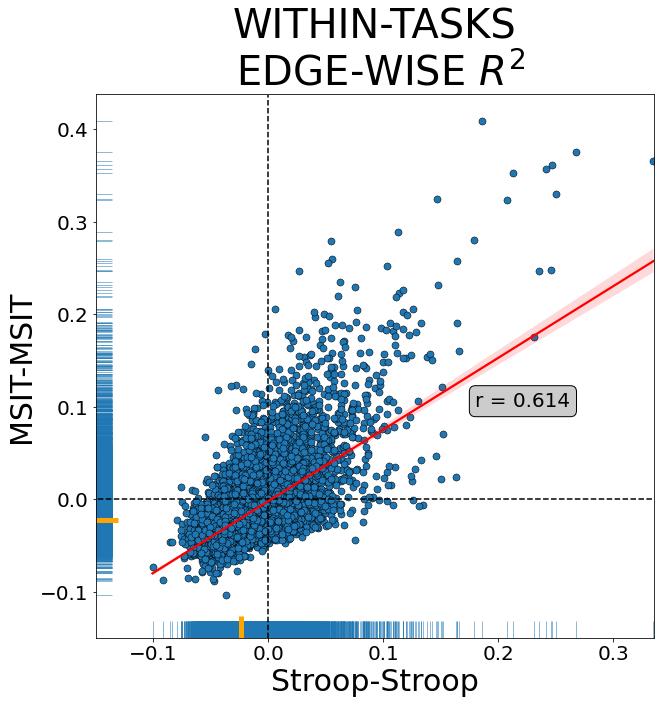

In [260]:
from scipy.stats import spearmanr, pearsonr

fig, ax= plt.subplots(figsize=(10,10))
sns.scatterplot(x="stroop_stroop", y="msit_msit", data=within_task_scores_df, ax=ax,
               edgecolor="black", linewidth=0.5, s=50)
sns.rugplot(x="stroop_stroop", y="msit_msit", data=within_task_scores_df , ax=ax, height=0.03,
             expand_margins=False, alpha=0.5)

sns.rugplot(x=np.quantile(within_task_scores_df.iloc[:,0], q=[0.5]), 
            y=np.quantile(within_task_scores_df.iloc[:,1], q=[0.5]), 
            ax=ax, height=0.04, color='orange',
             expand_margins=False, linewidth=5)

sns.regplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop_stroop,
                                   'MSIT': mean_r2_msit_msit}), 
            ax=ax, line_kws = {'color':'red'},
            scatter=False)

pearson_within = pearsonr(mean_r2_stroop_stroop, mean_r2_msit_msit)[0]
ax.annotate(text= "r = %.3f" % pearson_within, 
            xy=(0.18 ,0.1), 
            size=20, bbox = dict(boxstyle="round", fc="0.8"))

# sns.rugplot(x=np.quantile(within_task_scores_df.iloc[:,0], q=[0.05, 0.5, 0.95]), 
#             y=np.quantile(within_task_scores_df.iloc[:,1], q=[0.05, 0.5, 0.95]), 
#             ax=ax, height=0.04, color='r',
#              expand_margins=False, linewidth=5)
ax.set_xlabel("Stroop-Stroop", size=30)
ax.set_ylabel("MSIT-MSIT", size=30)
ax.set_title( "WITHIN-TASKS\n EDGE-WISE $R^2$", size=40)
ax.tick_params(labelsize=20)
xmin, xmax = ax.get_xlim()
#print(xmin, xmax)
ymin, ymax = ax.get_ylim()
#print(ymin, ymax)
ax.hlines(y=0, xmin=xmin, xmax=xmax, linestyle="--", color='k')
ax.vlines(x=0, ymin=ymin, ymax=ymax, linestyle="--", color='k')
ax.set_xlim([-0.15,0.335])
ax.set_ylim([-0.15,0.438])
plt.savefig("../../plots/predictions_within_task.svg", dpi=300)
plt.savefig("../../plots/predictions_within_task.png", dpi=300)
plt.savefig("../../plots/predictions_within_task.pdf", dpi=300)

Brain Plot to show regions with links both positive in within task predictions?

In [270]:
import sys
sys.path.append("../..")
from src.utils import map_on_atlas

In [273]:
from nilearn import plotting

/home/javi/Documentos/software/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [309]:
coords = plotting.find_parcellation_cut_coords("../../data/atlases/shen_2mm_268_parcellation.nii.gz")

<IPython.core.display.Javascript object>

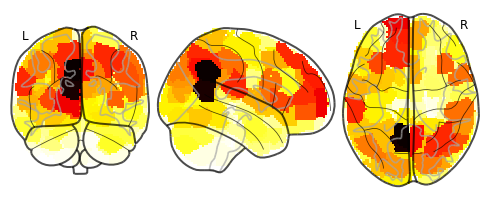

In [307]:
a = within_task_scores_df.iloc[:,0]
b = within_task_scores_df.iloc[:,1]

#sum((a<0) & (b>0))
foo = map_on_atlas(np.sum(squareform((a>0) & (b>0)), axis=1), 
             atlas_img="../../data/atlases/shen_2mm_268_parcellation.nii.gz")
plotting.plot_glass_brain(foo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

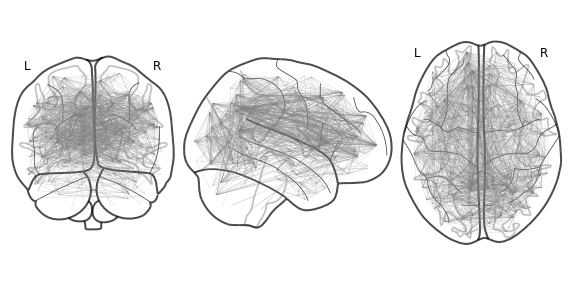

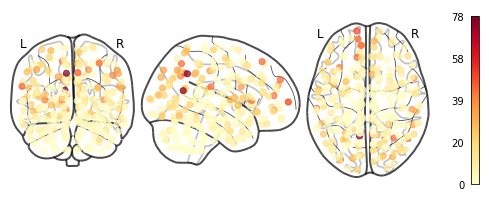

In [367]:
from sklearn.preprocessing import maxabs_scale, minmax_scale

a = within_task_scores_df.iloc[:,0]
b = within_task_scores_df.iloc[:,1]

adjacency_matrix = squareform((a>0) & (b>0)).astype(int)
fig, ax = plt.subplots(figsize=(10, 5))
plotting.plot_connectome(adjacency_matrix, 
                         coords,                          
                         node_size = 0, #300**maxabs_scale(np.sum(adjacency_matrix, axis=1)),
                         edge_kwargs={'linewidth': 0.2, 'color':'grey', 'linestyle':"--"}, 
                         axes=ax)
plotting.plot_markers(
    np.sum(adjacency_matrix, axis=1),
    coords,
    node_cmap=plt.cm.YlOrRd, 
)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

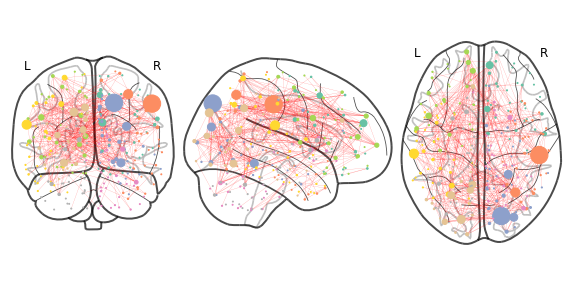

In [364]:
from sklearn.preprocessing import maxabs_scale, minmax_scale

a = between_task_scores_df.iloc[:,0]
b = between_task_scores_df.iloc[:,1]

adjacency_matrix = squareform((a>0) & (b>0)).astype(int)
fig, ax = plt.subplots(figsize=(10, 5))
plotting.plot_connectome(adjacency_matrix, 
                         coords,                          
                         node_size = 300**maxabs_scale(np.sum(adjacency_matrix, axis=1)),
                         edge_kwargs={'linewidth': 0.1}, axes=ax)

<IPython.core.display.Javascript object>

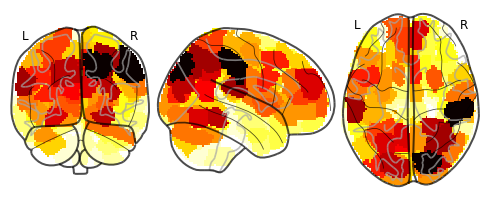

In [305]:
a = between_task_scores_df.iloc[:,0]
b = between_task_scores_df.iloc[:,1]

#sum((a<0) & (b>0))
foo = map_on_atlas(np.sum(squareform((a>0) & (b>0)), axis=1), 
             atlas_img="../../data/atlases/shen_2mm_268_parcellation.nii.gz")
plotting.plot_glass_brain(foo)

In [ ]:
foo = map_on_atlas(np.sum(squareform(np.all(within_task_scores_df > 0, axis=1).to_numpy()), 
                                              axis=1)/n_total*100, 
             atlas_img="../../data/atlases/shen_2mm_268_parcellation.nii.gz")
plotting.plot_glass_brain(foo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

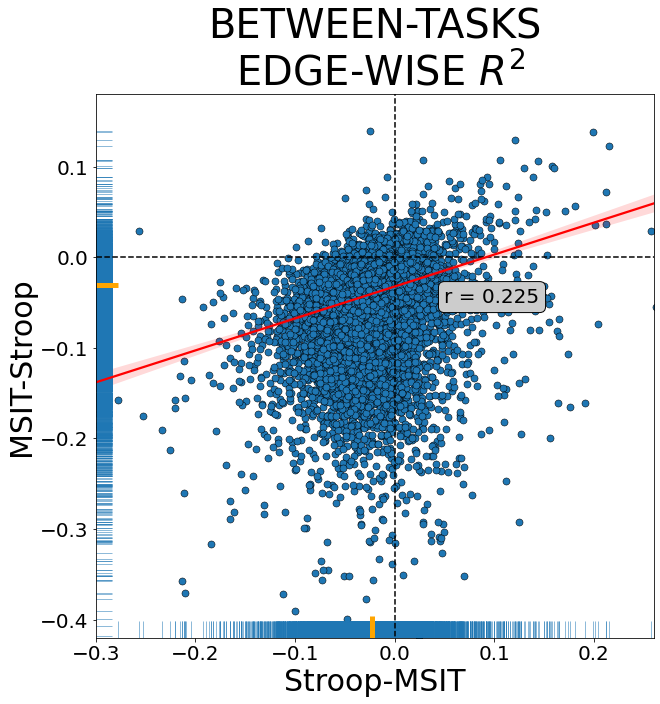

In [257]:
fig, ax= plt.subplots(figsize=(10,10))
sns.scatterplot(x="stroop_msit", y="msit_stroop", data=between_task_scores_df, ax=ax,
               edgecolor="black", linewidth=0.5, s=50)
sns.rugplot(x="stroop_msit", y="msit_stroop", data=between_task_scores_df , ax=ax, height=0.03,
             expand_margins=False, alpha=0.5)

# The median
sns.rugplot(x=np.quantile(between_task_scores_df.iloc[:,0], q=[0.5]), 
            y=np.quantile(between_task_scores_df.iloc[:,1], q=[0.5]), 
            ax=ax, height=0.04, color='orange',
             expand_margins=False, linewidth=5)

sns.regplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop_msit,
                                   'MSIT': mean_r2_msit_stroop}), 
            ax=ax,
            scatter=False, line_kws = {'color':'red'})

pearson_between = pearsonr(mean_r2_stroop_msit, mean_r2_msit_stroop)[0]
ax.annotate(text = "r = %.3f" % pearson_between, 
            xy=(0.05 ,-0.05), 
            size=20, bbox = dict(boxstyle="round", fc="0.8"))

# sns.rugplot(x=np.quantile(between_task_scores_df.iloc[:,0], q=[0.05, 0.5, 0.95]), 
#             y=np.quantile(between_task_scores_df.iloc[:,1], q=[0.05, 0.5, 0.95]), 
#             ax=ax, height=0.04, color='r',
#              expand_margins=False, linewidth=5)
ax.set_xlabel("Stroop-MSIT", size=30)
ax.set_ylabel("MSIT-Stroop", size=30)
ax.set_title( "BETWEEN-TASKS\n EDGE-WISE $R^2$", size=40)
ax.tick_params(labelsize=20)
xmin, xmax = ax.get_xlim()
#print(xmin, xmax)
ymin, ymax = ax.get_ylim()
#print(ymin, ymax)
ax.hlines(y=0, xmin=xmin, xmax=xmax, linestyle="--", color='k')
ax.vlines(x=0, ymin=ymin, ymax=ymax, linestyle="--", color='k')
ax.set_xlim([-0.3, 0.26])
ax.set_ylim([-0.42, 0.18])
plt.savefig("../../plots/predictions_between_task.svg", dpi=300)
plt.savefig("../../plots/predictions_between_task.png", dpi=300)
plt.savefig("../../plots/predictions_between_task.pdf", dpi=300)

In [244]:
mean_r2_stroop_stroop.shape

(35778,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

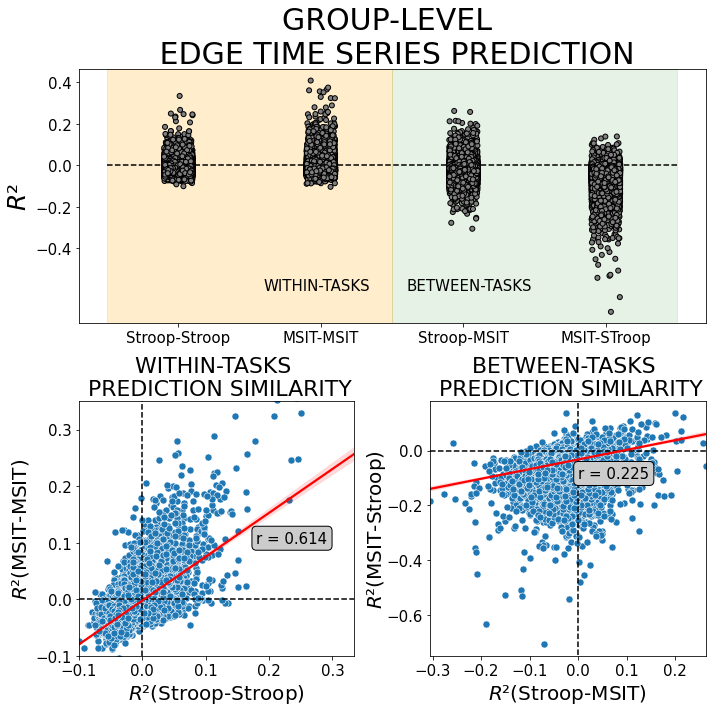

In [8]:
from matplotlib import gridspec
from scipy.stats import spearmanr, pearsonr


fig  = plt.figure(figsize=(10, 10))

gs = gridspec.GridSpec(2, 2)

ax11 = fig.add_subplot(gs[1,0])
ax12 = fig.add_subplot(gs[1,1])
ax2 = fig.add_subplot(gs[0,:])

sns.stripplot(x="variable", y="value", data = pd.melt(pd.concat([within_task_scores_df, 
                                                                 between_task_scores_df],
                                                                axis=1)), 
              ax=ax2,  color="grey", edgecolor="black", linewidth=1)
sns.scatterplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop_stroop,
                                   'MSIT': mean_r2_msit_msit}), 
                s=50,
                ax=ax11)

sns.regplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop_stroop,
                                   'MSIT': mean_r2_msit_msit}), 
            ax=ax11,
            scatter=False, line_kws = {'color':'red'})
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

ax2.hlines(y=0, xmin=xmin, xmax=xmax, linestyle="--", color='k')
ax2.axvspan(xmin, 1.5, alpha=0.2, color='orange')
ax2.axvspan(1.5, xmax, alpha=0.1, color='green')
ax2.annotate(text="WITHIN-TASKS", xy=(0.6 , -0.6), size=15)
ax2.annotate(text="BETWEEN-TASKS", xy=(1.6 , -0.6), size=15)#, 
ax2.set_xticklabels(["Stroop-Stroop", "MSIT-MSIT", "Stroop-MSIT", "MSIT-STroop"])#, size=20)
ax2.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
ax2.set_ylabel(r"$R²$", size=25)
ax2.set_xlabel("")
ax2.tick_params(labelsize=15)
ax2.set_title("GROUP-LEVEL \n EDGE TIME SERIES PREDICTION", size=30)
pearson_within = pearsonr(mean_r2_stroop_stroop, mean_r2_msit_msit)[0]
ax11.annotate(text= "r = %.3f" % pearson_within, 
            xy=(0.18 ,0.1), 
            size=15, bbox = dict(boxstyle="round", fc="0.8"))

sns.scatterplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop_msit,
                                   'MSIT': mean_r2_msit_stroop}), 
                s=50,
                ax=ax12)
ax11.set_xlabel(r"$R²$" + "(Stroop-Stroop)", size=20)
ax11.set_ylabel(r"$R²$" + "(MSIT-MSIT)", size=20)
ax11.set_title("WITHIN-TASKS \n PREDICTION SIMILARITY", size=22)
ax11.tick_params(labelsize=15)

xmin, xmax = ax11.get_xlim()
ymin, ymax = ax11.get_ylim()
ax11.hlines(y=0, xmin=xmin, xmax=xmax, linestyle="--", color='k')
ax11.vlines(x=0, ymin=ymin, ymax=ymax, linestyle="--", color='k')
ax11.set_ylim([-0.1,0.35])
#ax11.set_xlim([-0.2,0.3])

sns.regplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop_msit,
                                   'MSIT': mean_r2_msit_stroop}), 
            ax=ax12,
            scatter=False, line_kws = {'color':'red'})

pearson_between = pearsonr(mean_r2_stroop_msit, mean_r2_msit_stroop)[0]
ax12.annotate(text = "r = %.3f" % pearson_between, 
            xy=(0.0 ,-0.10), 
            size=15, bbox = dict(boxstyle="round", fc="0.8"))
ax12.set_xlabel(r"$R²$" + "(Stroop-MSIT)", size=20)
ax12.set_ylabel(r"$R²$" + "(MSIT-Stroop)", size=20, labelpad = -2)
ax12.set_title("BETWEEN-TASKS \n PREDICTION SIMILARITY", size=22)
ax12.tick_params(labelsize=15)
xmin, xmax = ax12.get_xlim()
ymin, ymax = ax12.get_ylim()
ax12.hlines(y=0, xmin=xmin, xmax=xmax, linestyle="--", color='k')
ax12.vlines(x=0, ymin=ymin, ymax=ymax, linestyle="--", color='k')
ax12.set_ylim([-0.75,0.18])
#ax12.set_xlim([-0.2,0.3])
plt.tight_layout()
plt.savefig("../../plots/generalizability/gsr/rsquares_montage.svg", dpi=300)
plt.savefig("../../plots/generalizability/gsr/rsquares_montage.png", dpi=300)
plt.savefig("../../plots/generalizability/gsr/rsquares_montage.pdf", dpi=300)

plt.savefig("../../figures/edge_gsr_rsquares_montage.svg", dpi=300)
plt.savefig("../../figures/edge_gsr_rsquares_montage.png", dpi=300)
plt.savefig("../../figures/edge_gsr_rsquares_montage.pdf", dpi=300)

In [ ]:
from scipy.stats import spearmanr
spearman_tasks = spearmanr(mean_r2_stroop, mean_r2_msit)[0]

Path("../../plots/generalizability/gsr").mkdir(exist_ok=True, parents=True)

fig, ax = plt.subplots(figsize=(8,7))
sns.scatterplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop,
                                   'MSIT': mean_r2_msit}), 
                s=50,
                ax=ax)

sns.regplot(x='Stroop', y='MSIT',
                data=pd.DataFrame({'Stroop': mean_r2_stroop,
                                   'MSIT': mean_r2_msit}), 
            ax=ax,
            scatter=False, line_kws = {'color':'red'})
ax.tick_params(labelsize=20)
ax.tick_params(labelsize=20)
y_min, y_max = ax.get_ylim()
x_min, x_max = ax.get_xlim()

y_hline = np.min(mean_r2_stroop[(l_r2_stroop>0) & (u_r2_stroop>0)])
x_vline = np.min(mean_r2_msit[(l_r2_msit>0) & (u_r2_msit>0)])

ax.vlines(x=0.0, ymin=y_min, ymax=y_max, linestyle="--", color='k', alpha=0.9)
ax.hlines(y=0.0, xmin=x_min, xmax=x_max, linestyle="--", color='k', alpha=0.9)
ax.set_ylim([-0.11, 0.4])
ax.set_xlabel(r'$R^2$' + "(Stroop)", size=30)
ax.set_ylabel(r'$R^2$' + "(MSIT)", size=30)
ax.annotate(text="Spearman's \n" + r"$\rho$"+ " = %.3f" % spearman_tasks, 
            xy=(0.2 ,0.08), 
            size=20, bbox = dict(boxstyle="round", fc="0.8"))
ax.set_title("EDGE-WISE \n GENERALIZABILITY", size=35)
plt.tight_layout()
plt.savefig("../../plots/generalizability/gsr/stroop_msit_rsquare.svg", dpi=300)
plt.savefig("../../plots/generalizability/gsr/stroop_msit_rsquare.png", dpi=300)
plt.savefig("../../plots/generalizability/gsr/stroop_msit_rsquare.pdf", dpi=300)

In [ ]:
len(mean_r2_msit)

In [ ]:
atlas_img = load_img("../../data/atlases/shen_2mm_268_parcellation.nii.gz")
atlas_img_data = atlas_img.get_fdata()

In [ ]:
cum_stroop[0]

In [ ]:
from nilearn.image import new_img_like
cum_stroop = squareform(mean_r2_stroop*((l_r2_stroop>0) & (u_r2_stroop>0)), checks=False).sum(axis=0)
cum_msit = squareform(mean_r2_msit*((l_r2_msit>0) & (u_r2_msit>0)), checks=False).sum(axis=0)

map_stroop = np.zeros_like(atlas_img.get_fdata())
for ii in np.arange(1, np.max(atlas_img.get_fdata())+1):
    map_stroop[atlas_img_data==ii] = cum_stroop[int(ii)-1]
map_stroop = new_img_like(atlas_img, map_stroop)

map_msit = np.zeros_like(atlas_img.get_fdata())
for ii in np.arange(1, np.max(atlas_img.get_fdata())+1):
    map_msit[atlas_img_data==ii] = cum_msit[int(ii)-1]
map_msit = new_img_like(atlas_img, map_msit)

In [ ]:
from nilearn.plotting import plot_glass_brain
plot_glass_brain(map_stroop, display_mode='lyrz', colorbar=True)
plot_glass_brain(map_msit, display_mode='lyrz', colorbar=True)

In [ ]:
#print("Stroop: mean R2 %.3f, 95 CI[%.3f, %.3f]" % (mean_r2_stroop, l_stroop, u_stroop))

In [ ]:
print(sum((l_stroop>0)*(u_stroop>0)))
print(sum((l_msit>0)*(u_msit>0)))

In [ ]:
from scipy.spatial.distance import dice
1-dice((l_stroop>0)*(u_stroop>0), (l_msit>0)*(u_msit>0))

In [ ]:
from scipy.stats import spearmanr
spearmanr(r2_scores_edges_stroop.mean(0), r2_scores_edges_msit.mean(0))

In [ ]:
1-dice(mean_r2_stroop > np.quantile(mean_r2_stroop, q=[0.95]),
       mean_r2_msit > np.quantile(mean_r2_msit, q=[0.95]))

In [ ]:
from sklearn.metrics import r2_score
n_shuffles = 100
train_size = 0.7
n_links = edge_imgs_2d[0].shape[1]

r2_scores_edges = np.zeros((n_shuffles, n_links))
for ii in tqdm.tqdm_notebook(range(n_shuffles)):
    rng = np.random.RandomState(ii) # the seed for each shuffling
    idxs = rng.choice(np.arange(n_subjects), n_subjects, replace=False)
    train_idxs = idxs[:int(train_size*n_subjects)]
    test_idxs = idxs[int(train_size*n_subjects):]
    
    # Estimate model
    intercepts_avg, betas_avg = estimate_model_parallel(train_idxs, n_jobs=10)
    
    # Prediction using this estimation
    Y_pred = prediction(intercepts_avg, betas_avg)
    
    # test
    Y_test_avg = np.array(edge_imgs_2d)[test_idxs].mean(0)
  
    r2_scores_edges[ii,:] = [r2_score(Y_test_avg[:,ii], Y_pred[:,ii]) for ii in range(n_links)]
  

In [ ]:
def percentile_bootstrap(scores, stat=np.mean, n_boots=1000, alpha=0.05, random_state=0):
    
    rng = np.random.RandomState(random_state)
    n_obs = len(scores)
    idxs = np.arange(n_obs)
    
    boot_dist = np.zeros(n_boots)
    for ii in range(n_boots):
        idxs_boot = rng.choice(idxs, size=n_obs)
        scores_boot = scores[idxs_boot]
        boot_dist[ii] = stat(scores_boot)
        
    # generate intervals
    l, u = np.quantile(boot_dist, q=[alpha/2, 1-alpha/2])
    
    return l, u

def percentile_bootstrap_2(scores, n_boots=1000, alpha=0.05, random_state=0):
    
    rng = np.random.RandomState(random_state)
    n_obs, n_features = scores.shape
    idxs = np.arange(n_obs)
    
    boot_dist = np.zeros(shape=(n_boots, n_features))
    for i_boot in range(n_boots):
        idxs_boot = rng.choice(idxs, size=n_obs)
        scores_boot = scores[idxs_boot,:]
        boot_dist[i_boot,:] = np.mean(scores_boot, axis=0)
        
    # generate intervals
    l, u = np.quantile(boot_dist, axis=0, q=[alpha/2, 1-alpha/2])
    
    return l, u

In [ ]:
l_perc, u_perc = percentile_bootstrap_2(r2_scores_edges)

In [ ]:
from scipy.stats import sem
mean_r2_edges = r2_scores_edges.mean(0)
sem_r2_edges = sem(r2_scores_edges, axis=0)
u_r2_emp = mean_r2_edges + 1.96*sem_r2_edges
l_r2_emp = mean_r2_edges - 1.96*sem_r2_edges

In [ ]:
from scipy.spatial.distance import dice
# Both give similar results
1-dice((l_perc>0) & (u_perc>0), (u_r2_emp>0) & (l_r2_emp>0))

In [ ]:
sum(l_r2_edges>0.01)

In [ ]:
sns.stripplot(mean_r2_edges[mask])
plt.xscale("log")

In [ ]:
sns.stripplot(r2_scores_edges.mean(0), color= n_links*["red"])

In [ ]:
betas_avg = np.array(first_level_betas).mean(axis=0)
intercepts_avg = np.array(first_level_intercepts).mean(axis=0)

In [ ]:
Y_pred = intercepts_avg + X.dot(betas_avg.T)

In [ ]:
Y_test_avg = np.array(edge_imgs_2d)[test_idxs].mean(0)
Y_test_avg.shape

In [ ]:
from sklearn.metrics import r2_score

sns.stripplot([r2_score(Y_test_avg[:,ii], Y_pred[:,ii]) for ii in tqdm.tqdm_notebook(range(Y_pred.shape[1]))])

In [ ]:
def aux_func(ii):
    import numpy as np
    from sklearn.metrics import r2_score
    return np.mean([r2_score(edge_imgs_2d[ix][:,ii], Y_pred[:,ii]) for ix in test_idxs])

In [ ]:
from joblib import delayed, Parallel
corrs_pred = Parallel(n_jobs=15)(delayed(aux_func)(ii) for ii in tqdm.tqdm_notebook(range(Y_pred.shape[1])))

In [ ]:
sum(np.array(corrs_pred)>0)

In [ ]:
sns.stripplot(corrs_pred)
sns.boxplot(corrs_pred)

In [ ]:
corrs_pred = []
for ii in tqdm.tqdm_notebook(range(Y_pred.shape[1])):
    corrs_pred.append(np.mean([np.corrcoef(edge_imgs_2d[ix][:,1], Y_pred[:,1])[0,1] for ix in test_idxs]))

In [ ]:
np.mean([r2_score(edge_imgs_2d[ix][:,0], Y_pred[:,0]) for ix in test_idxs])

In [ ]:
#[r2_score(edge_imgs_2d[ix][:,1], Y_pred[:,1]) for ix in test_idxs]